<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%204%20-%20One%20Neuron/Week%204%20-%20Activation%20functions%20and%20gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

## Function for plots

We will use the following function to perform some plotting, so you can safely ignore it for now. But the following cell should be run before the rest of the code.

In [0]:
def myplot(x,y, name, xlab, ylab):
    plt.rc('font', family='arial')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    
    plt.tight_layout()

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    plt.tick_params(labelsize=16)

    ax.plot(x, y, ls='solid', color = 'black')
    ax.set_xlabel(xlab, fontsize = 16)
    ax.set_ylabel(ylab, fontsize = 16)

## Activation functions plots

### Creation of arrays of activation functions

First let's create the data that we need to plot the different activation functions

In [0]:
x = np.arange(-5,5,0.1)
identity = x
sigmoid = 1.0 / (1.0 + np.exp(-x))
arctan = np.tanh(x)
relu = np.maximum(x, 0)
leakyrelu = relu - 0.05 * np.maximum(-x, 0)

## Identity

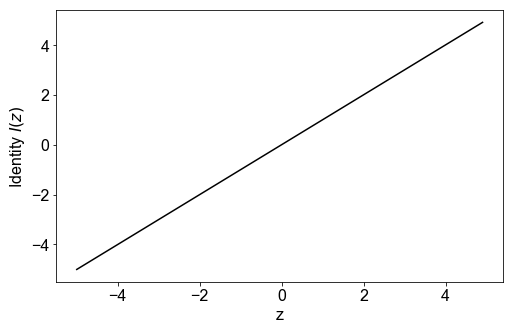

In [0]:
myplot(x, identity, 'Figure_1-4', 'z', 'Identity $I(z)$')

## Sigmoid activation function

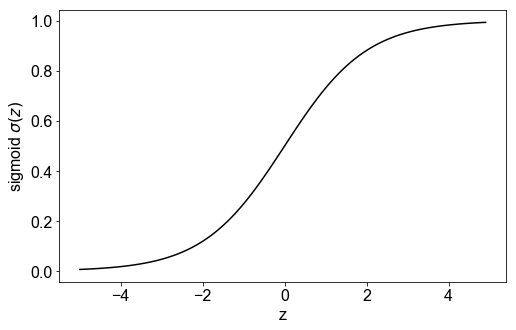

In [0]:
myplot(x, sigmoid, 'Figure_1-5', 'z', 'sigmoid $\sigma(z)$')

## tanh activation function

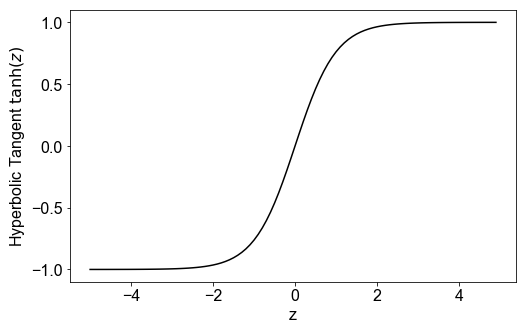

In [0]:
myplot(x, arctan, 'Figure_1-6', 'z', r'Hyperbolic Tangent $\tanh(z)$')

## ReLU activation function

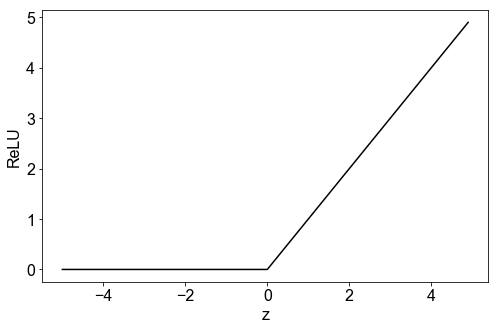

In [0]:
myplot(x, relu, 'Figure_1-7', 'z', 'ReLU')

## Leaky ReLU Activation function

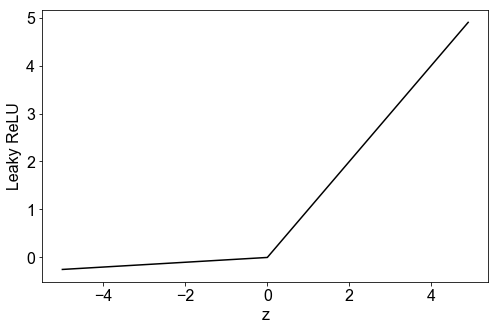

In [0]:
myplot(x, leakyrelu, 'Figure_1-8', 'z', 'Leaky ReLU')

# SWISH activation function

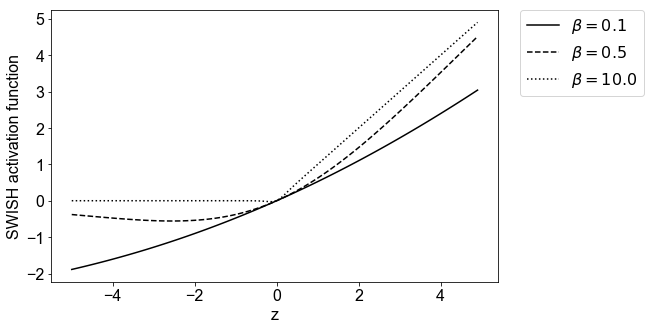

In [0]:
swish1 = x / (1.0 + np.exp(-0.1*x))
swish2 = x / (1.0 + np.exp(-0.5*x))
swish3 = x / (1.0 + np.exp(-10.0*x))

plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
plt.tick_params(labelsize=16)
ax.plot(x, swish1, ls='solid', color = 'black', label=r'$\beta=0.1$')
ax.plot(x, swish2, ls='dashed', color = 'black', label=r'$\beta=0.5$')
ax.plot(x, swish3, ls='dotted', color = 'black', label=r'$\beta=10.0$')
ax.set_xlabel('z', fontsize = 16)
ax.set_ylabel('SWISH activation function', fontsize = 16)
#plt.xlim(0,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)

# Gradient Descent Plots

# Image for well behaved converging

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 30
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

In [0]:
def cost_func(theta0, theta1):
    # The cost function, J(theta0, theta1) describing the goodness of fit.
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    # Our "hypothesis function", a straight line.
    return theta0 + theta1*x

In [0]:
# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

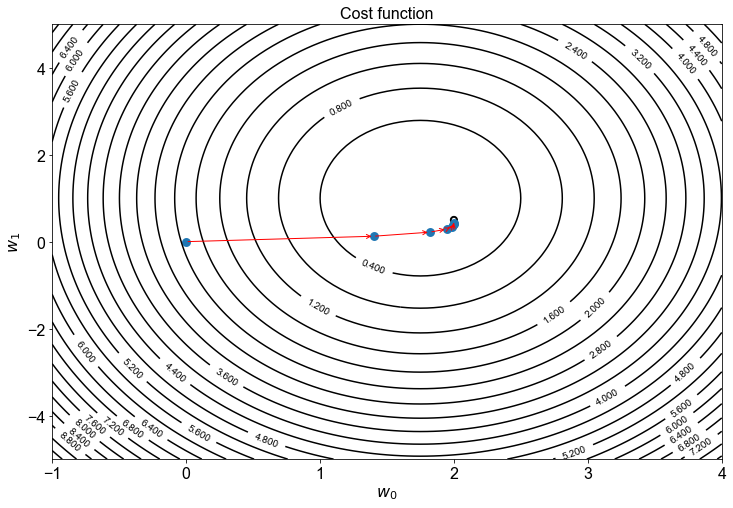

In [0]:
# Let's start with the plotting
fig, ax = plt.subplots(figsize=(12, 8))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.tick_params(labelsize=16)

# CHECK: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis 

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 30, colors='k')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 8
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', s=80, lw=0)

# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$', fontsize = 16)
ax.set_ylabel(r'$w_1$', fontsize = 16)
ax.set_title('Cost function', fontsize = 16)

plt.show()

## Figure 1-11

In [0]:
J1=J

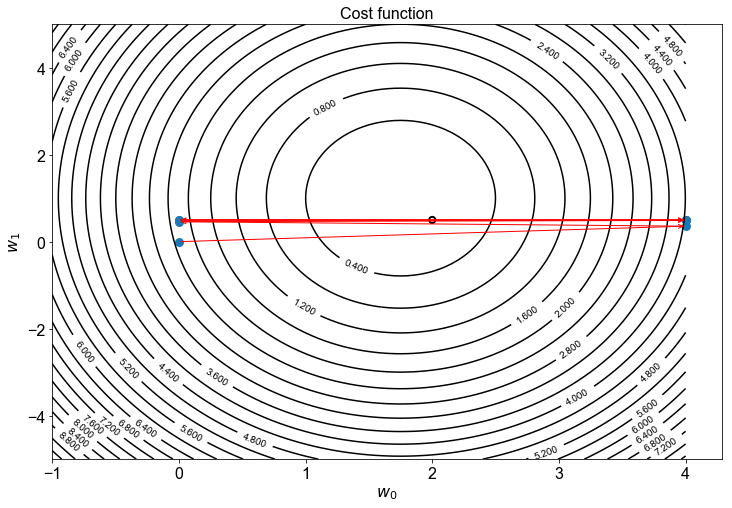

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(12, 8))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.tick_params(labelsize=16)

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 30, colors='k')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 8
alpha = 2
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', s=80, lw=0)

# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$', fontsize = 16)
ax.set_ylabel(r'$w_1$', fontsize = 16)
ax.set_title('Cost function', fontsize = 16)
import numpy as np
import matplotlib.pyplot as plt

## Figure 1-12

In [0]:
J2=J

## Learning rate too small

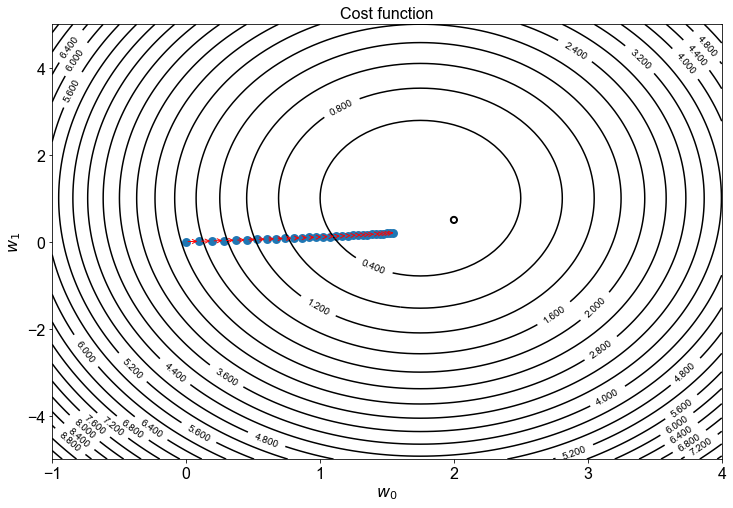

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(12, 8))

plt.rc('font', family='arial') 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.tick_params(labelsize=16)

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 30, colors='k')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 30
alpha = 0.05
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', s=80, lw=0)

# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$', fontsize = 16)
ax.set_ylabel(r'$w_1$', fontsize = 16)
ax.set_title('Cost function', fontsize = 16)
plt.show()

fig.savefig('Figure_1-12'+'.pdf', format='pdf', dpi=300,bbox_inches='tight')
fig.savefig('Figure_1-12'+'.png', format='png', dpi=300,bbox_inches='tight')

### Figure 1-13 - Cost function for different gammas

In [0]:
J3=J

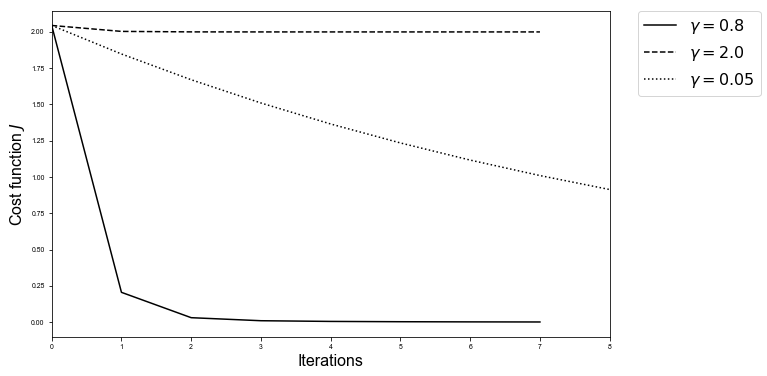

In [0]:
 plt.rc('font', family='arial')
    #plt.rc('font',**{'family':'serif','serif':['Palatino']}) 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
   #x = np.linspace(1., 8., 30)
ax.plot(J1, ls='solid', color = 'black', label='$\gamma=0.8$')
ax.plot(J2, ls='dashed', color = 'black', label='$\gamma=2.0$')
ax.plot(J3, ls='dotted', color = 'black', label='$\gamma=0.05$')
ax.set_xlabel('Iterations', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)
plt.xlim(0,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)

## Difference between lists and numpy arrays

In [0]:
lst1 = random.sample(range(1, 10**8), 10**7)
lst2 = random.sample(range(1, 10**8), 10**7)

random.sample takes a population and a sample size k and returns k random members of the population.

## With zip

In [0]:
%%timeit
out1 = [a*b for a,b in zip(lst1,lst2)]

1.09 s ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## with enumerate

In [0]:
%%timeit
ab = [val * lst2[i] for i, val in enumerate(lst1)]

1.43 s ± 41.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Standard loop

In [0]:
%%timeit
ab = [lst1[i]*lst2[i] for i in range(len(lst1))]

1.47 s ± 70.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## with numpy

In [0]:
list1_np = np.array(lst1)
list2_np = np.array(lst2)

In [0]:
%%timeit
out2 = np.multiply(list1_np, list2_np)

22.9 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [0]:
%%timeit
out2 = np.multiply(list1_np, list2_np) 

23.9 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [0]:
%%timeit
out2 = np.multiply(lst1, lst2)

1.16 s ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Exercises

## Exercise 1 (Difficulty: easy)

Try to see, as we have done before, what happens if you use the following equation for the learning rate (where $j$ is the number of the iteration)

$$
\alpha = 2 \ \ \ \text{for} \ \ j <4; \ \ \ \alpha =0.4 \ \ \ \text{for} \ \ j \geq 4
$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(figsize=(12, 8))

plt.rc('font', family='arial') 
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.tick_params(labelsize=16)

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 30, colors='k')
ax.clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

N = 30

#
# Initial value of the learning rate
#
alpha = 2.0


theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    
    
    
    #
    # Add your code here on how to modify alpha with the number
    # of iterations
    #
    
    
    
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))

colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    ax.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax.scatter(*zip(*theta), cmap='gray', s=80, lw=0)

# Labels, titles and a legend.
ax.set_xlabel(r'$w_0$', fontsize = 16)
ax.set_ylabel(r'$w_1$', fontsize = 16)
ax.set_title('Cost function', fontsize = 16)
plt.show()